#  Прогнозирование заказов такси

Компания такси собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Нам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders`.

<h1>Содержание<span class="tocSkip"></span></h1>
</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-библиотек-и-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и загрузка данных</a></span></li><li><span><a href="#Просмотр-основной-информации" data-toc-modified-id="Просмотр-основной-информации-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Просмотр основной информации</a></span></li><li><span><a href="#Преобразование-столбца-'datetime'" data-toc-modified-id="Преобразование-столбца-'datetime'-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Преобразование столбца <code>'datetime'</code></a></span></li><li><span><a href="#Ресемплирование-данных" data-toc-modified-id="Ресемплирование-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ресемплирование данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-графиков" data-toc-modified-id="Анализ-графиков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ графиков</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Разделение на выборки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Функция-для-метрики" data-toc-modified-id="Функция-для-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для метрики</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><code>Константная модель</code></a></span></li><li><span><a href="#LinearRegression()" data-toc-modified-id="LinearRegression()-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><code>LinearRegression()</code></a></span></li><li><span><a href="#RandomForestRegressor()" data-toc-modified-id="RandomForestRegressor()-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span><code>RandomForestRegressor()</code></a></span></li></ul></li><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение моделей</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Импорт библиотек и загрузка данных

В начале проекта импортируем необходимые библиотеки.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Зафиксируем случайное состояние в константе.

In [2]:
RANDOM_STATE = 322

### Просмотр основной информации

Загрузим данные в переменную `data`. Выведем основную информацию о данных методом `info()`.

In [3]:
data = pd.read_csv('taxi.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


Как мы видим, информация с датой и временем находится в отдельном столбце и имеет тип данных `object`. Посмотрим за какой период собраны наши данные: выведем начало и конец фрейма.

In [4]:
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [5]:
data.tail()

,datetime,num_orders
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39
26495,2018-08-31 23:50:00,53


### Преобразование столбца `'datetime'`

Данные собраны за полгода с 01.03.2018 по 31.08.2018 с шагом в 10 минут. Преобразуем столбец с датой в тип `datetime64` и установим его вместо индекса:

In [6]:
data['datetime'] = data['datetime'].astype('datetime64')
data.index = data['datetime']
data.drop('datetime', axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Индексы установились корректно. На всякий случай, проверим монотонные ли индексы.

In [8]:
data.index.is_monotonic

True

### Ресемплирование данных

Всё в порядке. Можем делать ресемплирование данных по одному часу. Так как наша задача спрогнозировать количество заказов на следующий час, нужно сделать сумму. Таким образом, мы получим ежечасную сумму заказов.

In [9]:
data = data.resample('1H').sum();
data.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


## Анализ

### Анализ графиков

Построим график для ресемплированных данных:

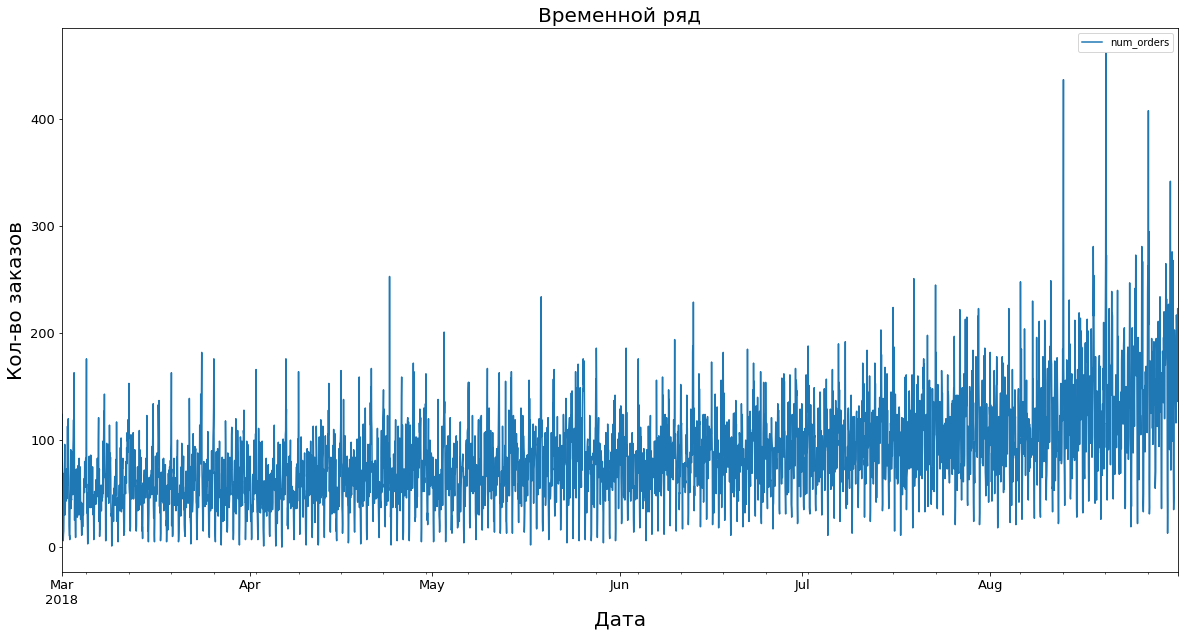

In [10]:
data.plot(figsize=(20, 10)).tick_params(labelsize=13)
plt.title('Временной ряд', fontsize=20)
plt.ylabel('Кол-во заказов', fontsize=20)
plt.xlabel('Дата', fontsize=20);

По графику сложно сказать что-либо. Проглядывается только небольшой рост ближе к концу графика. Чтобы нагляднее проверить ряд на стационарность добавим столбец со скользящим средним и построим график. Скользящее среднее сделаем с окном в 10.

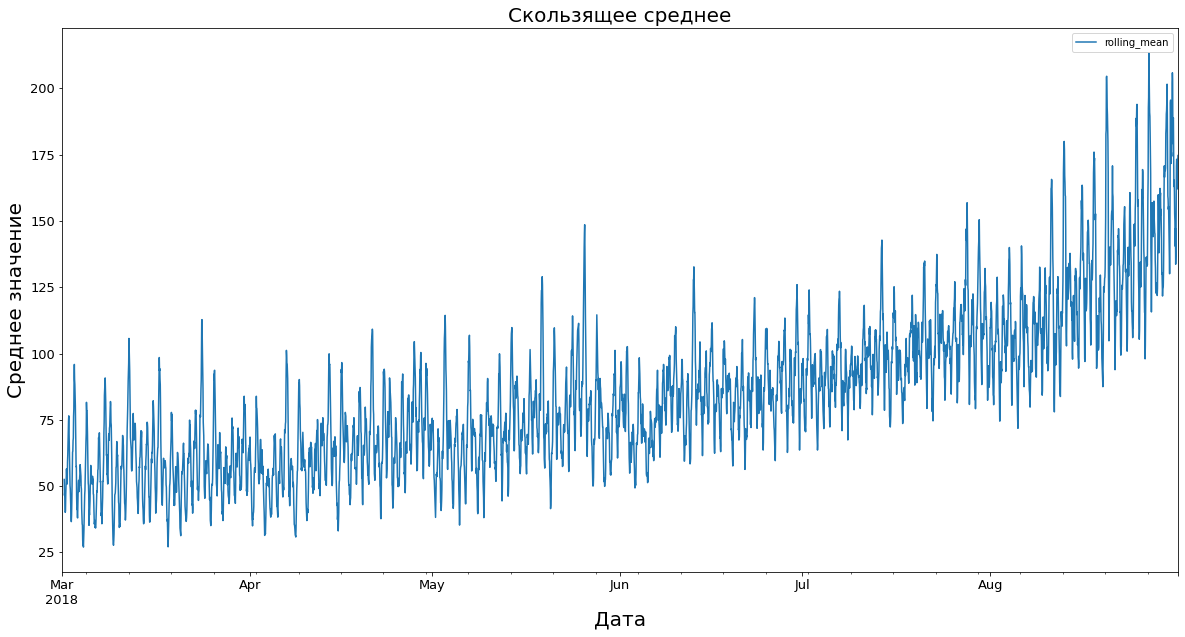

In [11]:
data['rolling_mean'] = data.rolling(10).mean()
data['rolling_mean'].plot(figsize=(20, 10), label='rolling_mean').tick_params(labelsize=13)
plt.legend()
plt.title('Скользящее среднее', fontsize=20)
plt.ylabel('Среднее значение', fontsize=20)
plt.xlabel('Дата', fontsize=20);

На этом графике уже явно виднеется увеличение среднего значения ближе к правому краю. Таким образом, можем сделать вывод, что стохастический процесс нестационарный. Но, так как в дальнейшем мы будем добавлять новые признаки в данные (скользящее среднее и лаги), высчитывать разность вместо фактических значений не обязательно. Сделаем это чуть позже, а сейчас декомпозируем ряд на тренд, сезонность и остаток. Построим графики для этих компонент:

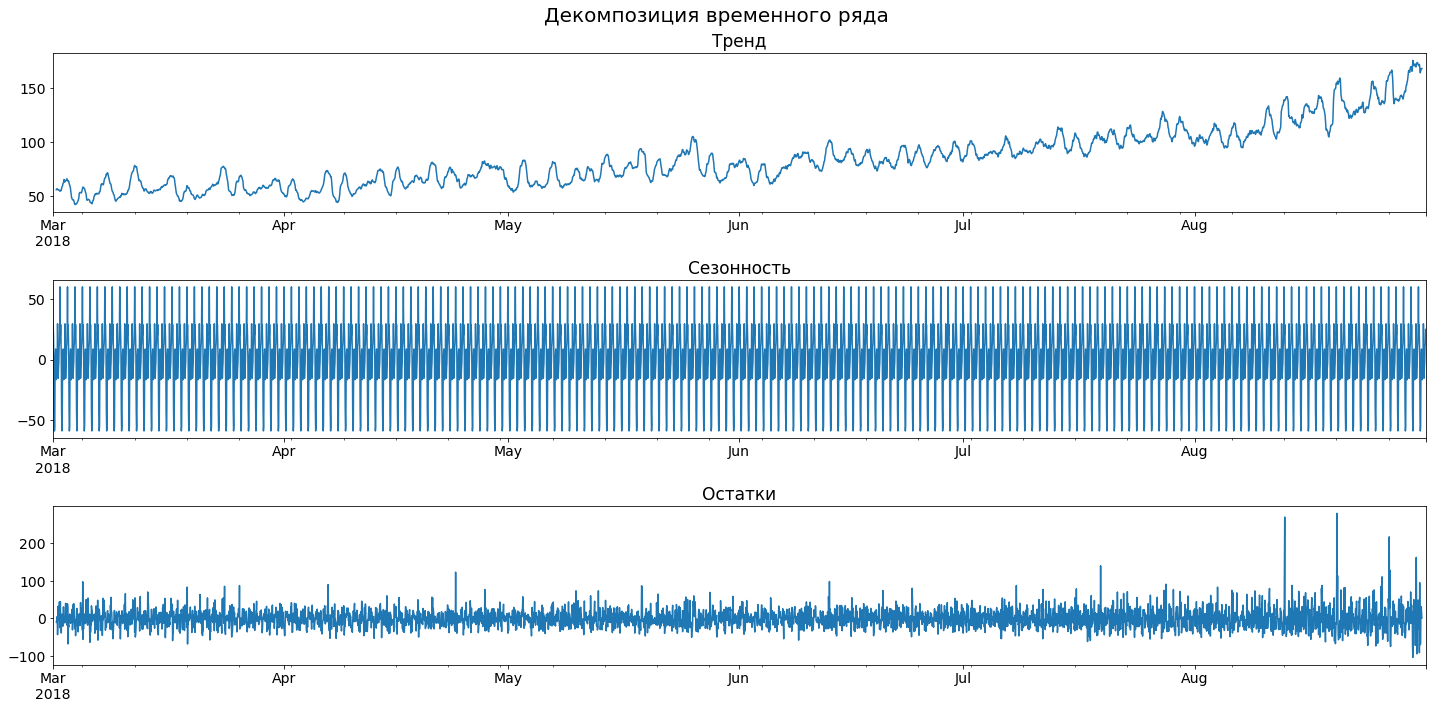

In [12]:
decomposed = seasonal_decompose(data['num_orders'])

plt.figure(figsize=(20, 10))
plt.suptitle('Декомпозиция временного ряда', fontsize=20)
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca()).tick_params(labelsize=14)
plt.title('Тренд', fontsize=17)
plt.xlabel('')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()).tick_params(labelsize=14)
plt.title('Сезонность', fontsize=17)
plt.xlabel('')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()).tick_params(labelsize=14)
plt.title('Остатки', fontsize=17)
plt.xlabel('')
plt.tight_layout()

Сезонность получилась с очень маленьким периодом, около одного дня. На графике тренда тоже мало что понятно, нужно приблизить оба графика. Построим график тренда за март, а график сезонности за первые три дня марта.

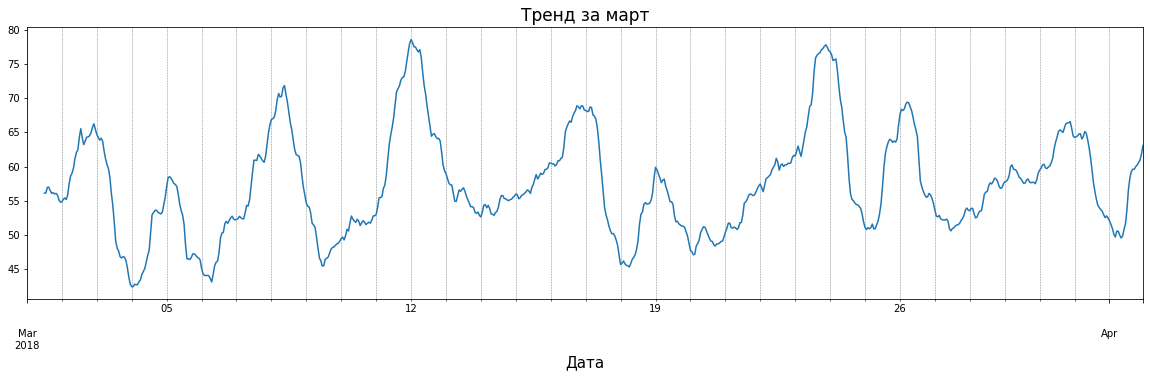

In [13]:
plt.figure(figsize=(20, 5))
decomposed.trend['2018-03-01':'2018-04-01'].plot(ax=plt.gca())
plt.grid(color='grey', linewidth=0.5, linestyle='--', which='major', axis='x')
plt.grid(color='grey', linewidth=0.5, linestyle='--', which='minor', axis='x')
plt.title('Тренд за март', fontsize=17)
plt.xlabel('Дата', fontsize=15);

На графике тренда можно отметить, что самое большое кол-во заказов приходится на вечер воскресенья - утро понедельника. А нижние границы часто оказываются в районе вечера субботы - утра воскресенья.

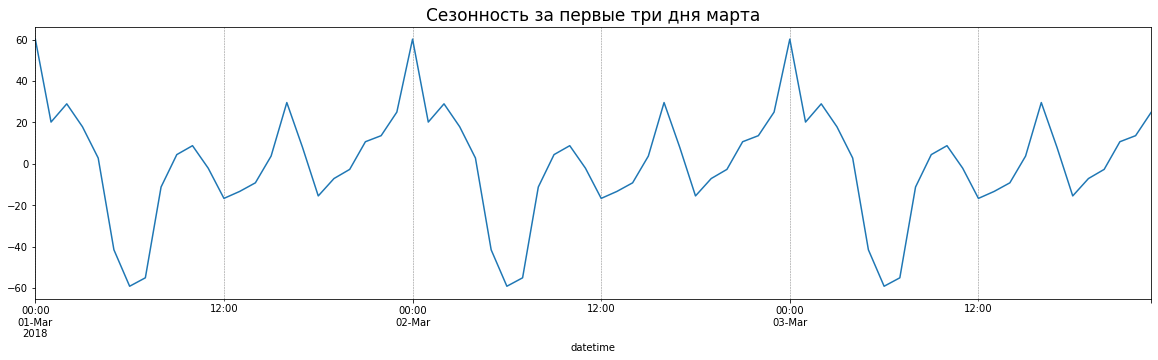

In [14]:
plt.figure(figsize=(20, 5))
decomposed.seasonal['2018-03-01':'2018-03-03'].plot(ax=plt.gca())
plt.grid(color='grey', linewidth=0.5, linestyle='--', which='major', axis='x')
plt.grid(color='grey', linewidth=0.5, linestyle='--', which='minor', axis='x')
plt.title('Сезонность за первые три дня марта', fontsize=17);

На графике сезонности можно отметить высокие значения в районе полуночи и резкое падение к утру. Можем предположить, что ночью люди предпочитают добираться домой на такси, а к утру уже можно и добраться своим ходом, так как начинает ходить общественный транспорт. Да и прилетающих самолётов ранним утром явно меньше, чем поздним вечером.

После анализа тренда и сезонности можем сделать вывод, что ключевыми признаками будут:
- лаг предыдущего часа
- лаг того же часа предыдущего дня
- лаг недельной давности

### Создание признаков

Добавим в данные информацию о текущем числе, дне недели и часе. Информацию о месяце добавлять не обязательно, т.к. каждый месяц у нас встречается лишь один раз - данные всего за полгода. Лаги добавим такие, какие описали в выводе ранее.

In [15]:
def make_features(df, rolling_mean_size, lags):
    data = df
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in lags:
        data['lag_' + str(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    
make_features(data, 24, [1, 24, 24 * 7])
data.head(3)

,num_orders,rolling_mean,day,dayofweek,hour,lag_1,lag_24,lag_168
datetime,,,,,,,,
2018-03-01 00:00:00,124,NaN,1,3,0,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,1,124.0,NaN,NaN
2018-03-01 02:00:00,71,NaN,1,3,2,85.0,NaN,NaN


### Разделение на выборки

Разделим данные на выборки в соотношении 9:1. Валидационная выборка не понадобится, так как мы будем делать кросс-валидацию

In [16]:
train, test = train_test_split(data, random_state=RANDOM_STATE, shuffle=False, test_size=0.1)

In [17]:
train.head(3)

,num_orders,rolling_mean,day,dayofweek,hour,lag_1,lag_24,lag_168
datetime,,,,,,,,
2018-03-01 00:00:00,124,NaN,1,3,0,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,1,124.0,NaN,NaN
2018-03-01 02:00:00,71,NaN,1,3,2,85.0,NaN,NaN


In [18]:
train.dropna(inplace=True)

train_target = train['num_orders']
test_target = test['num_orders']
train_features = train.drop(['num_orders'], axis=1)
test_features = test.drop(['num_orders'], axis=1)

print(train_features.shape, test_features.shape)

(3806, 7) (442, 7)


## Обучение

### Функция для метрики 

Напишем функцию для подсчёта метрики RMSE. Сделаем из нее скорер для `GridSearchCV`.

In [19]:
def rmse(target, preds):
    return abs(mean_squared_error(target, preds, squared=False))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

### Обучение моделей

#### `Константная модель`

Посмотрим какую метрику выдаёт константная модель, которая все предсказания заполняет средним значением:

In [20]:
dummy_preds = np.full_like(train_target, train_target.mean(), dtype='float64')
dummy_score = rmse(train_target, dummy_preds)
print('Значение RMSE для константной модели:', dummy_score)

Значение RMSE для константной модели: 38.67821730509339


Метрика на константной модели получилась уже лучше целевой. Это значит, что нам нужно получить значение меньше, чем 38.68 на тестовых данных.

Обучим три модели на тренировочных данных и посчитаем метрики кросс-валидацией. Так как у нас временной ряд, воспользуемся инструментом `TimeSeriesSplit()`. Укажем в нём 6 сплитов, так как у нас данные за 6 месяцев.

#### `LinearRegression()`

In [21]:
%%time
model_lr = LinearRegression()
params = {}
search_lr = GridSearchCV(model_lr, params, n_jobs=-1, cv=TimeSeriesSplit(n_splits=6), scoring=rmse_scorer)
search_lr.fit(train_features, train_target)
best_lr = search_lr.best_estimator_
search_lr.best_params_

CPU times: total: 141 ms
Wall time: 9.17 s


{}

In [22]:
print('Лучшее значение RMSE для линейной регрессии:', abs(search_lr.best_score_))

Лучшее значение RMSE для линейной регрессии: 22.932848719317224


#### `RandomForestRegressor()`

In [23]:
%%time
model_forest = RandomForestRegressor(random_state=RANDOM_STATE)
params = {'max_depth': np.arange(2, 23, 5), 
          'n_estimators': np.arange(10, 151, 20)}
search_forest = GridSearchCV(model_forest, params, n_jobs=-1, cv=TimeSeriesSplit(n_splits=6), scoring=rmse_scorer)
search_forest.fit(train_features, train_target)
best_forest = search_forest.best_estimator_
search_forest.best_params_

CPU times: total: 2.5 s
Wall time: 31 s


{'max_depth': 7, 'n_estimators': 150}

In [24]:
print('Лучшее значение RMSE для случайного леса:', abs(search_forest.best_score_))

Лучшее значение RMSE для случайного леса: 23.169506148607365


#### `DescisionTreeRegressor()`

In [25]:
%%time
model_tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
params = {'max_depth': np.arange(2, 50)}
search_tree = GridSearchCV(model_tree, params, n_jobs=-1, cv=TimeSeriesSplit(n_splits=6), scoring=rmse_scorer)
search_tree.fit(train_features, train_target)
best_tree = search_tree.best_estimator_
search_tree.best_params_

CPU times: total: 375 ms
Wall time: 1.11 s


{'max_depth': 5}

In [26]:
print('Лучшее значение RMSE для случайного дерева:', abs(search_tree.best_score_))

Лучшее значение RMSE для случайного дерева: 25.154869323911413


### Сравнение моделей

Создадим таблицу с результатами:

In [27]:
pd.DataFrame([abs(search_lr.best_score_), abs(search_tree.best_score_), abs(search_forest.best_score_), dummy_score], 
            index=['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'DummyRegressor'],
            columns=['rmse_cv'])

,rmse_cv
LinearRegression,22.932849
DecisionTreeRegressor,25.154869
RandomForestRegressor,23.169506
DummyRegressor,38.678217


Лучшая метрика получилась на линейной регрессии. Проверим её на тестовых данных.

## Тестирование

In [28]:
preds = best_lr.predict(test_features)
rmse(test_target, preds)

35.19901435996852

Построим графики исходного и предсказанного ряда:

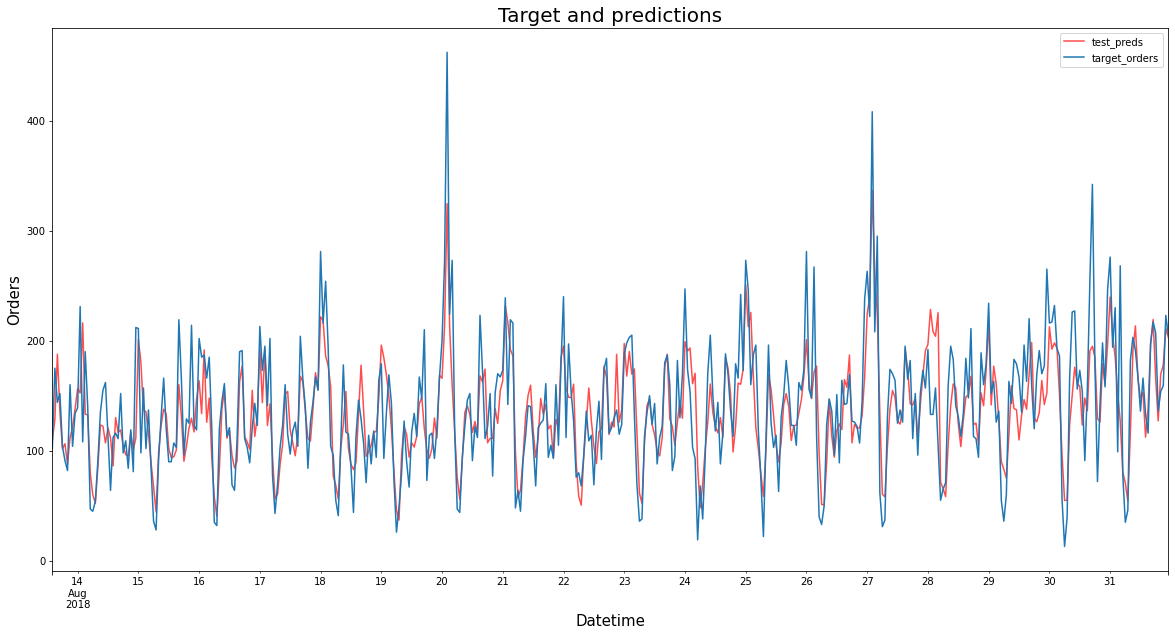

In [35]:
plt.figure(figsize=(20, 10))
pd.Series(preds, index=test_target.index).plot(color='red', alpha=0.7, label='test_preds')
test_target.plot(label='target_orders')
plt.legend()
plt.title('Target and predictions', fontsize=20)
plt.ylabel('Orders', fontsize=15)
plt.xlabel('Datetime', fontsize=15);

Метрика получилась хуже, чем на тренировочных данных, модель немного переобучилась. Однако она всё равно достигла целевой метрики и проявила себя лучше, чем константная модель. Задача выполнена.